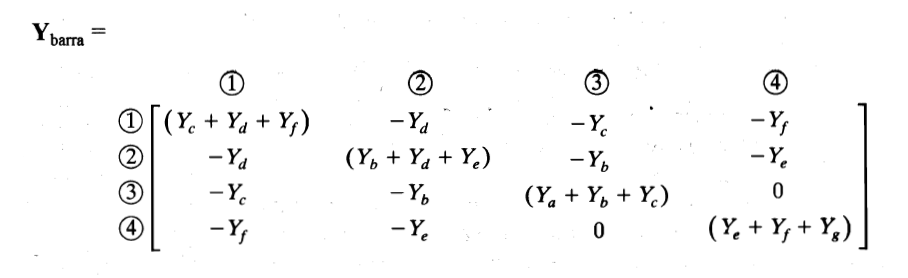

In [ ]:
import networkx,numpy as np
class Trafo:
    def __init__(self,vp,vs,s,xf) -> None:
        self.vp = vp
        self.vs = vs
        self.s = s
        self.xf = xf
        self.relacao = vp/vs

def calcula_corrent_pu(potencia_base,tensao_base):
    return potencia_base/(3**.5) * tensao_base

def calcula_z_pu(potencia_base,trafo:Trafo,tensao_base_primario):
    return trafo.xf*potencia_base/trafo.s * (trafo.vp/tensao_base_primario)**2*1j

def calcula_tensao_base(base_anterior,trafo:Trafo):
    return base_anterior/trafo.relacao
def cria_matriz_admitancia(nodes:list[int],edges):
    # Create a directed graph
    G = networkx.DiGraph()
    G.add_nodes_from(nodes)
    for u, v, w in edges:
        G.add_weighted_edges_from([(u, v, -w), (v, u, -w)])
    # Display the adjacency matrix
    adj_matrix = networkx.adjacency_matrix(G).todense()
    for i in G.nodes():
        adj_matrix[i - 1, i - 1] = -sum(G[i][j]["weight"] for j in G[i])

    return adj_matrix

def calcula_z_base(tensao_base,potencia_base):
    zb = tensao_base**2 / potencia_base #V² / Sb
    return zb


# Add some arcs (edges)
# Must add edges to ref as an edge to itself.
edges = [
    (1, 3, -4j),
    (1, 5, -0.8j),
    (1, 4, -5j),
    (2, 4, -5j),
    (2, 5, -0.8j),
    (2, 3, -2.5j),
    (3, 4, -8j),
    (3, 5, -0.8j),
]


# Teste slide

In [ ]:
ya=-0.8j
yb=-.8j
yc = -.8j
yd=-5j
ye=-0
yf=-4j
yg=-2.5j
yh=-5j
maty = np.array([
    [(ya+yd+yf),0,-yf,-yd],
    [0,(yg+yb+yh),-yg,-yh],
    [-yf,-yg,(yf+yg+ye+yc),-ye],
    [-yd,-yh,-ye,(yd+ye+yh)]
])

I = np.array([1.2,5,-6,0])
Z = np.linalg.inv(maty)

In [ ]:
maty

array([[-0. -9.8j,  0. +0.j ,  0. +4.j ,  0. +5.j ],
       [ 0. +0.j , -0. -8.3j,  0. +2.5j,  0. +5.j ],
       [ 0. +4.j ,  0. +2.5j,  0. -7.3j,  0. +0.j ],
       [ 0. +5.j ,  0. +5.j ,  0. +0.j ,  0.-10.j ]])

In [ ]:
Z

array([[-0.+0.48099478j, -0.+0.37650602j, -0.+0.3924992j ,
        -0.+0.4287504j ],
       [-0.+0.37650602j, -0.+0.49698795j, -0.+0.37650602j,
        -0.+0.43674699j],
       [ 0.+0.3924992j ,  0.+0.37650602j,  0.+0.48099478j,
         0.+0.38450261j],
       [ 0.+0.4287504j ,  0.+0.43674699j,  0.+0.38450261j,
         0.+0.53274869j]])

In [ ]:
V = Z @ I
V

array([0.+0.10472865j, 0.+0.67771084j, 0.-0.53243949j, 0.+0.39121975j])

# Exemplo Slide




In [ ]:
vb1 = 230e3
na =138/69
vb2 = vb1/na
nc= 69/34.5
vb3 = vb2/nc
nb = 69/13.8
vb4 = vb2/nb

In [ ]:
sb = 50e6
zb1 = vb1**2/sb
zb2 = vb2**2/sb
zb3 = vb3**2/sb
zb4 = vb4**2/sb

In [ ]:
ib1 = calcula_corrent_pu(sb,vb1)
ib2 = calcula_corrent_pu(sb,vb2)
ib3 = calcula_corrent_pu(sb,vb3)
ib4 = calcula_corrent_pu(sb,vb4)

ib1,ib2,ib3,ib4

(6639528095680.697, 3319764047840.3486, 1659882023920.1743, 663952809568.0697)

In [ ]:
lta = 150*(.12+.92j)/zb2 #Está na zona de base 2
ltb = 230*(.19+1.84j)/zb3 #Está na zona de base 3
lta,ltb

((0.06805293005671077+0.5217391304347826j), (0.6608695652173914+6.4j))

In [ ]:
ta = Trafo(138e3,69e3,41.5e6,5.5/100)

zta = calcula_z_pu(sb,ta,vb1)
zta

0.023855421686746987j

In [ ]:
tb = Trafo(69e3,13.8e3,33e6,7/100)
ztb = calcula_z_pu(sb,tb,vb2)
ztb

0.038181818181818185j

In [ ]:
tc = Trafo(69e3,34.5e3,24e6,5/100)
ztc = calcula_z_pu(sb,tc,vb2)
ztc

0.0375j

In [ ]:
5.5/100*(138e3)**2/41.5e6


25.239036144578314

# Exercicio 2

In [ ]:
import networkx,numpy as np
class Trafo:
    def __init__(self,vp,vs,s,xf) -> None:
        self.vp = vp
        self.vs = vs
        self.s = s
        self.xf = xf
        self.relacao = vp/vs

def calcula_corrent_pu(potencia_base,tensao_base):
    return potencia_base/(3**.5) * tensao_base

def calcula_z_pu(potencia_base,trafo:Trafo,tensao_base_primario):
    return trafo.xf*potencia_base/trafo.s * (trafo.vp/tensao_base_primario)**2*1j

def calcula_tensao_base(base_anterior,trafo:Trafo):
    return base_anterior/trafo.relacao
def cria_matriz_admitancia(nodes:list[int],edges):
    # Create a directed graph
    G = networkx.DiGraph()
    G.add_nodes_from(nodes)
    for u, v, w in edges:
        G.add_weighted_edges_from([(u, v, -w), (v, u, -w)])
    # Display the adjacency matrix
    adj_matrix = networkx.adjacency_matrix(G).todense()
    for i in G.nodes():
        adj_matrix[i - 1, i - 1] = -sum(G[i][j]["weight"] for j in G[i])

    return adj_matrix

def calcula_z_base(tensao_base,potencia_base):
    zb = tensao_base**2 / potencia_base #V² / Sb
    return zb

In [ ]:
ta = Trafo(138e3,69e3,41.5e6,5.5/100)
tb = Trafo(69e3,13.8e3,33e6,7/100)
tc = Trafo(69e3,34.5e3,24e6,5/100)
sb = 100e6
vb1 = 138e3

In [ ]:
vb2 = calcula_tensao_base(vb1,ta)
vb5 = calcula_tensao_base(vb2,tc)
vb4 = calcula_tensao_base(vb2,tb)

In [ ]:
zta = calcula_z_pu(sb,ta,vb1)
ztc = calcula_z_pu(sb,tc,vb2)
ztb = calcula_z_pu(sb,tb,vb2)
zta,ztb,ztc

(0.13253012048192772j, 0.21212121212121215j, 0.20833333333333334j)

In [ ]:
zb2 = calcula_z_base(vb2,sb)
zb5 = calcula_z_base(vb5,sb)
zb2,zb5

(47.61, 11.9025)

In [ ]:
ia = calcula_corrent_pu(sb,vb2)
ib = calcula_corrent_pu(sb,vb5)
ia,ib

(3983716857408.4185, 1991858428704.2092)

In [ ]:
lta = (.12+.92j)*30/zb2
ltb = (.19+1.84j)*10/zb5
lta,ltb

((0.07561436672967864+0.5797101449275363j),
 (0.1596303297626549+1.5458937198067635j))

In [ ]:
zf1 = .1j
zf2 = 1e12

In [ ]:
yta = zta**-1
ytb = ztb**-1
ytc = ztc**-1
ylta = lta**-1
yltb = ltb**-1
yf1 = zf1**-1
yf2 = zf2**-1

ylta,yltb

((0.22123605947955388-1.6961431226765797j),
 (0.06609214717830317-0.6400502674109361j))

In [ ]:
edges = [(1,2,yta),(2,5,ytc),(2,3,ylta),(3,4,ytb),(5,6,yltb),(1,1,yf1),(6,6,yf2)]
Y = cria_matriz_admitancia(range(1,7),edges)
for l in Y:
    print(l)
print()
Z = np.linalg.inv(Y)
for l in Z:
    print(l)

[-0.-17.54545455j  0. +7.54545455j  0. +0.j          0. +0.j
  0. +0.j          0. +0.j        ]
[ 0.         +7.54545455j  0.22123606-14.04159767j
 -0.22123606 +1.69614312j  0.         +0.j
  0.         +4.8j         0.         +0.j        ]
[ 0.        +0.j         -0.22123606+1.69614312j  0.22123606-6.41042884j
  0.        +4.71428571j  0.        +0.j          0.        +0.j        ]
[ 0.+0.j          0.+0.j          0.+4.71428571j -0.-4.71428571j
  0.+0.j          0.+0.j        ]
[ 0.        +0.j          0.        +4.8j         0.        +0.j
  0.        +0.j          0.06609215-5.44005027j -0.06609215+0.64005027j]
[ 0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j         -0.06609215+0.64005027j  0.06609215-0.64005027j]

[1.00002247e-14+0.1j 2.32538469e-14+0.1j 2.32575770e-14+0.1j
 2.32579500e-14+0.1j 4.40883477e-14+0.1j 1.98678068e-13+0.1j]
[2.32535345e-14+0.1j        5.40721981e-14+0.23253012j
 5.40808717e-14+0.23253012j 5.40817391e-14+0.23253012j

In [ ]:
I = np.array((-10j,0,0,0,0,-0.09+.0436j))
V = Z @ I
V

array([0.99564   -0.009j     , 0.98986169-0.02092771j,
       0.98986169-0.02092771j, 0.98986169-0.02092771j,
       0.98077835-0.03967771j, 0.89901066-0.17184826j])

In [ ]:
np.abs(V)
np.rad2deg(np.angle(V))

array([ -0.51790604,  -1.21117012,  -1.21117012,  -1.21117012,
        -2.31665632, -10.82169414])